# Empirical Models and Linear Regression

Author: John Bolte, Biological & Ecological Engineering Department, Oregon State University
<hr/>

## Empirical Modeling - What does that mean?
First, let’s review what we mean by an empirical model.   Recall that an empirical model is generally just an equation developed by fitting the equation to a set of data.  We determine the mathematical form of the equation a priori, and then estimate any parameters the equation contains by examining data containing the response variable, the variable being estimated by the model, and any input, or explanatory variables contained in the model.

The basic idea of empirical modeling is to determine the relationship between an *output variable* (𝒚) (a.k.a. response variable) and a set of one or more *input* variables (𝑿) (explanatory variables), e.g.

	𝒚=𝒇(𝑿,𝑨)

where 𝑨 is a set of model *parameters*.

To develop an empirical model, our first requirement is **data**.  We must have sufficient observational data relating our *response variable*, **y**, to our *predictor variable(s)*, **X**.  This is a fundamental requirement of empirical modeling. Additionally, we will need to specify a *functional form* for our model - the equation describing the relationship between **y** and **X** that we will fit to the data.

Let’s look at an example focusing on addressing the question “Are crop planting dates changing though time, and if so, how fast?” The graph below shows planting dates for two crops, corn and strawberries, at a location in the Pacific Northwest, plotted over time. The orange boxes on the chart are observed planting dates through time for Field Corn, and the green triangles are for Strawberries. How would you determine the expected planting date for these crops next year?
<img src="./PlantingDates.png" width='600px' style='float:right;padding:1em'></img>

Let’s suppose we want to fit these datasets to a line.  Remember, a line is an equation of the form _y=intercept + slope*x_.  For this model, our **y** variable – the _response_ variable that we are trying to predict – is the planting date for the crop of interest.  The **x** variable – the _predictor_ variable – is the Year.  Our task with our regression model is to estimate the planting date for any given year. 

For our line model, this means finding the “best-fit” values for the slope and intercept, the parameters in our model.  To do so, we will emply the technique of **Simple Linear Regression**, which simply means we will assume a line as our model function form, and _regress_ (fit) the line to our data by finding the "best-fit" values for the model parameters, in this case slope and intercept, based on our observational data.  Our procedure will determine the "best-fit" values of slope and intercept by **minimizing the difference between our model equation and the observed data**.  More specifically, we will minimize the "error sum of squares" (S<sub>r</sub>) between the observations and the corresponding modeled results, defined as:

$ S_r = \sum{(y_{obs}-y_{modeled})^2} $, summed over all observations.


## Linear Regression

In the example above, our model functional form is assumed to be a line, i.e.:

$ Planting Date =\alpha * \beta*Year, $

There are many ways to solve for our two parameters, $\alpha and \beta$; we will show two such approaches below, both using Python to carry out our regression procedure.  In the first case, we will use the `polyfit` method in the `numpy` package; in the second will will use the `linregress` method in the `scipy.stats` package.  Generally, our procedure is as follows:

1. Load the observational data into our program (using `pandas`).  In this case, the data is available on the web at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/crvo_1991_2016_plantdates.xlsx, in the form of an Excel file.  You can examine this file in Excel by clicking on the link. You will see columns representing various crops, and rows reprenting years.  We will focus our attention on Strawberries (column 'SBRY') for the first regression, and Field Corn (column 'FCRN') in our second example. 
2. Visualize the data (using `matplotlib`).
3. Run the regression (using either `polyfit` or `linregress` methods.
4. Assess the results.

Python code is provided below.

['Station' 'Year' 'ALFM' 'APPL' 'BLUB' 'FCRN' 'LAWN' 'SBRY' 'SGRN' 'TBER'
 'WGRN']


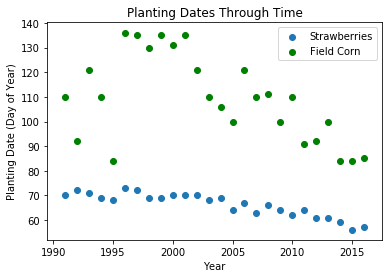

In [23]:
# Program for running a linear regression on the Planting Date dataset
import numpy as np        # because it's numpy
import pandas as pd       # data library
import matplotlib.pyplot as plt

# Step 1 - get the data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/crvo_1991_2016_plantdates.xlsx" )
print( df.columns.values )   # print the column headers to the console

xObs = df['Year']    # extract the predictor "x" data (column='Year')
yObs = df['SBRY']    # extract the response "y" data (column='SBRY')

# Step 3 - plot the data
plt.scatter(xObs,yObs, label='Strawberries')
plt.scatter(xObs,df['FCRN'], color='green', label='Field Corn')
plt.title('Planting Dates Through Time')
plt.xlabel('Year')
plt.ylabel('Planting Date (Day of Year)')
plt.legend()
plt.show()

As you can see, their appears to be a broad trend downward in the data, and we could imagine fitting a straight line through the data reasonably well(particulary for Strawberries).  We'll do that in our next code block below, which 1) runs the regression procedure to determine the "best-fit" slope and intercept values (see https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html for the documentation on `numpy.polyfit()`), and 2) plot the results.  We will generate two plots; the first will show the observed and modeled data, the second will plot observed vs. predicted data and a *line of perfect fit*. 

The Best-fit parameter values are: intercept=1192.38, slope=-0.56


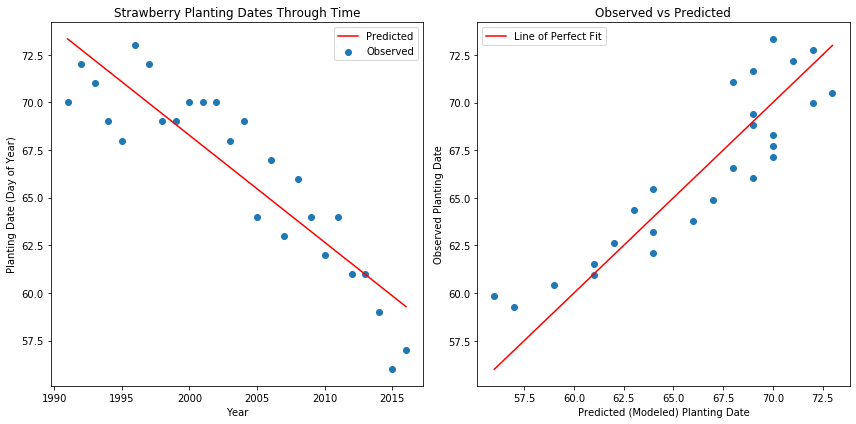

In [24]:
# We've already loaded the data (above), run the regression using polyfit()
(slope,intercept) = np.polyfit(xObs, yObs, 1)    # solve the first order polynomial - returns list of coefficients

print( "The Best-fit parameter values are: intercept={:.2f}, slope={:.2f}".format(intercept, slope))

# generate modeled results (predictions) for each observed point
yModeled = intercept + slope*xObs

# plot the results
plt.figure(figsize=(12,6))

# first plot - observed and modeled data
plt.subplot(1,2,1)
plt.scatter(xObs,yObs,label="Observed")   # observed data
plt.plot(xObs, yModeled, 'r', label="Predicted")
plt.title('Strawberry Planting Dates Through Time')
plt.xlabel('Year')
plt.ylabel('Planting Date (Day of Year)')
plt.legend()

# second plot - observed vs, predicted
plt.subplot(1,2,2)
plt.scatter(yObs, yModeled)
plt.plot((yObs.min(),yObs.max()),(yObs.min(),yObs.max()), 'r', label="Line of Perfect Fit")
plt.title('Observed vs Predicted')
plt.xlabel('Predicted (Modeled) Planting Date')
plt.ylabel('Observed Planting Date')
plt.legend()
plt.tight_layout()
plt.show()

Intepreting these results, we can say that the slope of -0.56 indicates that on average, the planting date for Strawberries at this location, over the time period captured by the observational dataset, is advancing by 0.56 days per year, or about 5.6 days per decade. Note that we aren't trying to *explain* why this is the case (that would get us into the realm of mechanistic modeling), we are just fitting the model to the data and interpreting the results.

### How well did the model perform at fitting data?

Is is generally important to assess how well the model was able to fit the data. We will discuss techniques for assessing model performance more fully in the [Model Validation and Testing](../6-Model-Validation-and-Testing/Model-Validation-and-Testing.html) section of this chapter. For now, though, we'd like a statistic that provides an indication of how the model performed, and a simple metric for this is the **coefficient of determination** (r<sup>2</sup>). The r<sup>2</sup> value is a  “goodness of fit” statistic measuring how much of the variability observed in the data can be explained by the model. It is defined as the normalized difference between the error sum of squares of the fitted model compared to the null model as follows:

Error sum of squares of null model: $ S_t = \sum{(y_i-y_{mean})^2} $

Error sum of squares of fitted model: $ S_r = \sum{(y_i-y_{modeled})^2} $

Normalized difference (coefficient of determination): $\large r^2 = \frac{S_t - S_r}{S_t} $

Ideally, a given model will explain all the variability in an observational dataset, meaning it would perfectly predict all data points.  Conversely, a poor model would explain very little or none of the observed data.

For most problems you are likely to encounter in ecological engineering, reasonable r-square values generally run between about 0.5 and 0.9, meaning these models typical can explain about 50 to 90 percent of the variability in an observed dataset.  

Given observed and modeled results, we can calculate r<sup>2</sup> using the formula above as follows:

In [25]:
mean = yObs.mean()
St = np.sum(np.power((yObs-mean),2))
Sr = np.sum(np.power((yObs-yModeled),2))
r2 = (St-Sr)/St     # coefficient of determination
print("The r2 value is {:.3}".format(r2))

The r2 value is 0.811


This indicates that the fitted model was able to explain roughly 81 percent of the variability observed in the data, and doesn't account for the remaining 19 percent.

### Let's repeat this process, this time using the `scipy.stats` package's `linregress()` function.

The `numpy.polyfit()` method is very simple to use (and can be applied to higher-order polynomial functions as well), but doesn't provide much additional information about the regression that the best-fit parameter values. One alternative that does is the `linregress()` method in the `scipy.stats` package.  In additional to estimating the best fit parameters for a line, this method returns information about how well the model performed. Specifically, it returns the best-fit parameters, an **r-value** that is a measure of goodness of fit for the resulting model to the observed data, the **p-value** for the fit, essentially an indicator of how confident we are in the model results, and the **standard error** of the model compared to the observed data.  

Let's also look at a different crop in the observational dataset, field corn, whose planting dates are in column "FCRN" in the observational dataset.

linregress() results: Slope: -1.19, Intercept: 2.49e+03, r2-value: 0.266, p-value: 0.00694


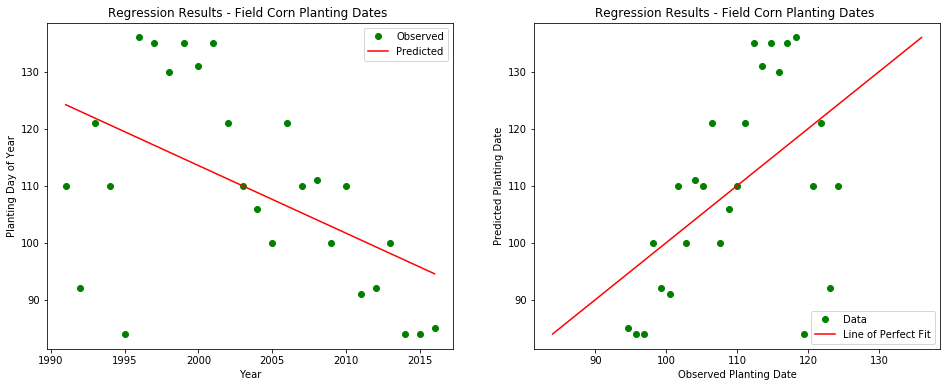

In [17]:
from scipy import stats   # for linregress()

# update our observed data to reflect Field Corn
yObs = df['FCRN']    # extract the response "y" data (column='FCRN')

# run regression
slope, intercept, r_value, p_value, std_err = stats.linregress(xObs,yObs)
print( "linregress() results: Slope: {:.3}, Intercept: {:.3}, r2-value: {:.3}, p-value: {:.3}".format(slope, intercept, r_value**2, p_value ) )

# generate modeled results
yModeled = slope * xObs + intercept

# make a figure with two plots - first is observed, predicted vs. time
plt.figure(figsize=(16, 6))
plt.subplot( 1,2, 1)   
plt.plot(xObs,yObs,'o', color='green' )   # add observation series
plt.plot(xObs, yModeled, '-', color='red' )    # add modeled series
plt.title( "Regression Results - Field Corn Planting Dates ")
plt.legend( ['Observed', 'Predicted'], loc='upper right')
plt.xlabel( "Year")
plt.ylabel( "Planting Day of Year")

# second is predicted vs observed
plt.subplot( 1, 2, 2)   
plt.plot(yModeled,yObs,'o', color='green' )   # add observation series
plt.plot((yObs.min(),yObs.max()),(yObs.min(),yObs.max()), '-', color='red' )    # add modeled series
plt.title( "Regression Results - Field Corn Planting Dates ")
plt.legend( ['Data', 'Line of Perfect Fit'], loc='lower right')
plt.xlabel( "Observed Planting Date")
plt.ylabel( "Predicted Planting Date")

plt.show()

There are a couple things to note here.  First, the observed data for Field Corn has considerably more variability than what we saw for Strawberries in the first example, although there does appear to be a general downward trend in the data through time, similar to what we observed with Strawberries. As a consequence, we would expect the Field Corn model to not perform as well, and indeed, the r<sup>2</sup> value of 0.266 indicates that the correlation between the model and the data is considerably lower;  this model only explains roughly 27 percent of the variability in the observed results, and other (unknown) factors are responsible for the remaining variability. Second, the rate at which planting dates are advancing is roughly double the rate for strawberries, 12 days per decade compared to the 5.6 days/decade observed for Strawberries.

**So what can we conclude from this analysis**  First, we should recognize that we have limited data available for this analysis;  more data would help build confidence in our results. 

Second, we can examine the p-value to assess the confidence that our model is better than the "null" hypothesis (that the model does no better than the mean of the data at predicting results).  Small p-values generally mean one of two things:

1. The null hypothesis is true, but we were just very lucky in obtaining our observed sample.
2. Our sample is the way it is due to the fact that the null hypothesis is false.

In general, the smaller the p-value, the more evidence that we have that our model is good. Generally p-values less than 0.05 are interpreted as "the model is very likely better at describing the data than the null model", whereas p-values greater than 0.05 indicate low confidence in the model.  In this case, our p-value of 0.00694 indicates our model is very likely to outperform the null model.

### Using the model to predict future planting dates

Once we have fit our model, whe can use it predict future planting dates.  For example, using the Field Corn model, we can estimate the planting date in 2030 as follows: 

In [5]:
plantingDate2030 = intercept + slope*2020
print("Planting date in 2030 is estimated to be the {}th day of the year".format(int(plantingDate2030)))


Planting date in 2030 is estimated to be the 89th day of the year


## Reflections on this module

Above, we developed procedures for fitting a very two very simple models (lines) to two sets of data, and did an initial assessment of how these model performed.

Some additional considerations:

1. We chose to model the data with a line, but what if we wanted to use a different functional form for our model?  In the case of linear models, these techniques are easily extended to higher-order polynominals (e.g. $ y=\alpha + \beta_1 (X) + \beta_2 (X^2) $, a second order polynomial)  These **Polynomial Regression** techniques are discussed [next](./Polynomial-Regression.html). Problems which have multiple explanatory variables are termed **Multiple Regression** problems, and are discussed [here](./Multiple-Regression.html).  In the case of more complex, nonlinear model functions, we need to apply [**Nonlinear Regression**](../2-Nonlinear-Regression/Nonlinear-Regression.html) techniques - the methods presented here apply only to linear models.

2. Our approach for assessing model performance was limited.  More robust techniques for model testing and validation are presented [here](../6-Model-Validation-and-Testing/Model-Validation-and-Testing.html)

3. We should be skeptical of any model, particularly empirical models, when forecasting outside of the range of data used to fit the model. It is always appropriate to question model results! 



## Additional Resources

A set of worked [example problems](./Example-Problems-Linear-Regression.html) is available to see these and similar techniques in action.  Additionally, a set of [exercises for you to solve](./Exercise-Linear-Regression.html) is also available; you are encouraged to work through these exercises.

A useful summary of Linear Regression is available on [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

Two useful videos describing Linear Regression are available on YouTube - the first [provides an overview of Linear Regression](https://www.youtube.com/watch?v=EDPCsD6BzWE), the second [uses Python to solve these models](https://www.youtube.com/watch?v=88_wgLgx0_k).